In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#from plotly.subplots import make_subplots
from datetime import datetime

In [2]:
pd.read_csv('data_net_migration.csv')

,Year,Pakistan,India
0,1960,0,52264
1,1961,-133982,114181
2,1962,-131607,110398
3,1963,-129202,48986
4,1964,-126712,5837
...,...,...,...
59,2019,-1177218,-593495
60,2020,-588736,-34772
61,2021,-471395,-301970
62,2022,-165988,-487303


## Data Span
 
- We have data from 1960 t0 2023 downloaded from World Bank.
- Data is about net migration rate in india and pakistan .
- We will compare net migration rate in india and pakistan.

> **Net Migration**:  
> Net migration refers to the difference between the number of people entering (immigrants) and the number of people leaving (emigrants) a region or country over a specific time period. It helps measure whether a region is gaining or losing population due to migration.

- `The Formula of Net Migration (NM)`:

$$
\text{Net Migration (NM)} = \text{Immigrants (I)} - \text{Emigrants (E)}
$$


Where:

•	`Immigrants `(I): Number of people moving into the region.

•  `Emigrants `(E): Number of people moving out of the region.


$$
\text{NMR} = \frac{\text{Immigrants (I)} - \text{Emigrants (E)}}{\text{Mid-year Population (P)}} \times 1000
$$


In [3]:
import wbdata

In [ ]:
# downloading dataset of population from API of wbdata 
import requests
import pandas as pd

# Define the API URL and parameters
BASE_URL = "http://api.worldbank.org/v2/country/{country}/indicator/SP.POP.TOTL"
COUNTRIES = ["IND", "PAK"]  # India and Pakistan country codes
START_YEAR = 1960
END_YEAR = 2023
FORMAT = "json"

# Create an empty DataFrame to store results
data = []

# Fetch data for each country
for country in COUNTRIES:
    url = f"{BASE_URL}?format={FORMAT}&date={START_YEAR}:{END_YEAR}"
    response = requests.get(url.format(country=country))
    
    if response.status_code == 200:
        json_data = response.json()
        if len(json_data) > 1:
            records = json_data[1]
            for record in records:
                if record["value"] is not None:
                    data.append({
                        "Country": record["country"]["value"],
                        "Year": record["date"],
                        "Population": record["value"]
                    })
    else:
        print(f"Failed to fetch data for {country}: {response.status_code}")

# Convert the collected data to a DataFrame
df = pd.DataFrame(data)

# Save data to a CSV file
df.to_csv("population_data_india_pakistan.csv", index=False)

print("Data successfully downloaded and saved to 'population_data_india_pakistan.csv'")


In [ ]:
# downloading dataset of net migration from API of wbdata
import wbdata
import pandas as pd

# Define the countries and indicator
countries = ["IND", "PAK"]  # ISO codes for India and Pakistan
indicator = {"SM.POP.NETM": "Net migration"}  # Indicator for net migration

# Fetch data from the World Bank API
data = wbdata.get_dataframe(indicator, country=countries)

# Reset the index and ensure the 'date' column is numeric
data = data.reset_index()
data['date'] = pd.to_numeric(data['date'], errors='coerce')  # Convert to numeric to handle filtering

# Filter the data for the years 1960 to 2023
data = data[(data['date'] >= 1960) & (data['date'] <= 2023)]

# Rename columns for clarity
data.rename(columns={"date": "Year", "country": "Country"}, inplace=True)

# Save the cleaned data to a CSV file
data.to_csv("net_migration_india_pakistan_1960_2023.csv", index=False)

# Print the first few rows of the data
print("Downloaded and filtered data:")
print(data.head())



Downloaded and filtered data:
  Country  Year  Net migration
0   India  2023      -486136.0
1   India  2022      -487303.0
2   India  2021      -301970.0
3   India  2020       -34772.0
4   India  2019      -593495.0


- Now, we will combine above two requirements   One `Population` and Second `Net Migration` and make a Dataset 

In [ ]:
# downloading dataset of Population and net migration from API of wbdata
import wbdata
import pandas as pd
from datetime import datetime

# Define countries: India (IND), Pakistan (PAK), Bangladesh (BGD), Afghanistan (AFG), Sri Lanka (LKA)
countries = ["IND", "PAK", "BGD", "AFG", "LKA"]

# Define indicators for Total Population and Net Migration
indicators = {
    'SP.POP.TOTL': 'Total Population',  # Total Population
    'SM.POP.NETM': 'Net Migration'      # Net Migration
}

# Define the date range
start_date = datetime(1960, 1, 1)
end_date = datetime(2023, 1, 1)

# Fetch data from the World Bank API for the defined indicators and countries
df = wbdata.get_dataframe(indicators, country=countries)

# Convert the 'date' from the index to a column and extract the year
df = df.reset_index()  # Convert MultiIndex to columns
df['year'] = pd.to_datetime(df['date']).dt.year  # Extract the year from the date

# Filter data by year range (1960-2023)
df = df[(df['year'] >= start_date.year) & (df['year'] <= end_date.year)]

# Drop the original 'date' column
df.drop(columns=['date'], inplace=True)

# Reorder columns for readability
columns = ['country', 'year'] + [col for col in df.columns if col not in ['country', 'year']]
df = df[columns]

# Print a sample of the DataFrame to verify
print(df.head())

# Save the DataFrame to a CSV file
df.to_csv('./population_data_and_net_migration_1960_2023.csv', index=False)


       country  year  Total Population  Net Migration
0  Afghanistan  2023        42239854.0       -65846.0
1  Afghanistan  2022        41128771.0       -65846.0
2  Afghanistan  2021        40099462.0      -183672.0
3  Afghanistan  2020        38972230.0       166821.0
4  Afghanistan  2019        37769499.0        -8082.0


- We downloaded the data of `Afghanistan, Sri Lanka, Bangladesh, India, Pakistan` of both requirements 

In [ ]:
import wbdata
import pandas as pd

# Define the countries and indicators
countries = ["AFG", "LKA", "BGD", "IND", "PAK"]  # ISO codes for Afghanistan, Sri Lanka, Bangladesh, India, Pakistan
indicators = {
    "SM.POP.NETM": "Net migration",  # Indicator for net migration
    "SP.POP.TOTL": "Population",     # Indicator for total population
}

# Fetch data from the World Bank API
data = wbdata.get_dataframe(indicators, country=countries)

# Reset the index and ensure the 'date' column is numeric
data = data.reset_index()
data['date'] = pd.to_numeric(data['date'], errors='coerce')  # Convert to numeric to handle filtering

# Filter the data for the years 1960 to 2023
data = data[(data['date'] >= 1960) & (data['date'] <= 2023)]

# Rename columns for clarity
data.rename(columns={"date": "Year", "country": "Country"}, inplace=True)

# Save the combined dataset to a CSV file
#data.to_csv("net_migration_population_1960_2023.csv", index=False)

# Print the first few rows of the dataset
print("Downloaded and combined data:")
print(data.head())


Downloaded and combined data:
       Country  Year  Net migration  Population
0  Afghanistan  2023       -65846.0  42239854.0
1  Afghanistan  2022       -65846.0  41128771.0
2  Afghanistan  2021      -183672.0  40099462.0
3  Afghanistan  2020       166821.0  38972230.0
4  Afghanistan  2019        -8082.0  37769499.0


In [ ]:
data.head()

,Country,Year,Net migration,Population
0,Afghanistan,2023,-65846.0,42239854.0
1,Afghanistan,2022,-65846.0,41128771.0
2,Afghanistan,2021,-183672.0,40099462.0
3,Afghanistan,2020,166821.0,38972230.0
4,Afghanistan,2019,-8082.0,37769499.0


In [ ]:
data.describe()

,Year,Net migration,Population
count,320.000000,3.200000e+02,3.200000e+02
mean,1991.500000,-1.746498e+05,2.381422e+08
std,18.501885,4.372562e+05,3.708735e+08
min,1960.000000,-2.290411e+06,8.622466e+06
25%,1975.750000,-2.873812e+05,1.888430e+07
50%,1991.500000,-8.455950e+04,7.269946e+07
75%,2007.250000,-8.405000e+02,1.829264e+08
max,2023.000000,1.834556e+06,1.428628e+09


- Let's Start plotting data 

<Axes: xlabel='Net migration', ylabel='Count'>

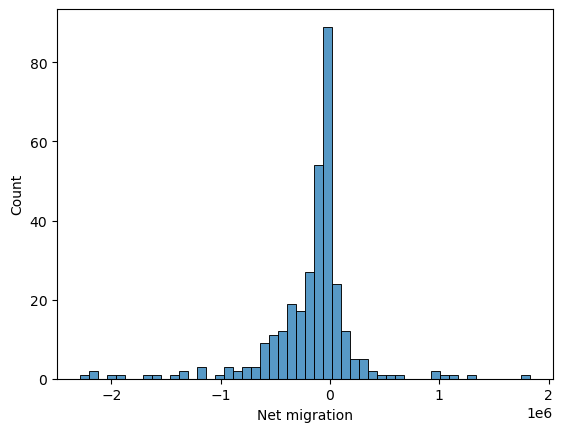

In [ ]:
sns.histplot(data=data, x='Net migration', bins=50)

<Axes: xlabel='Population', ylabel='Count'>

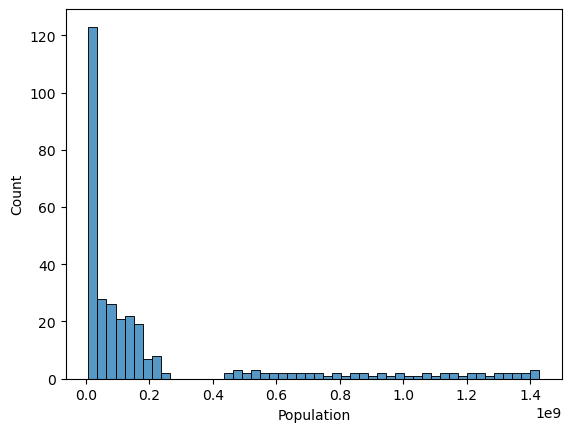

In [ ]:
sns.histplot(data=data, x='Population', bins=50)

In [ ]:
# plotly for histogram of net migration
import plotly.express as px

fig = px.histogram(data, x="Net migration", nbins=50,
                   title= "Net Migration Distribution")
fig.show()

In [ ]:
#plotly for histogram of Population
import plotly.express as px

fig = px.histogram(data, x="Population", nbins=50,
                   title= "Population Distribution")
fig.show()

In [ ]:
# lineplot using `years` on the x-axis and `total population` on the y-axis
import plotly.express as px

fig = px.line(data, x='Year', 
              y='Population', 
              color='Country',
              title='Population Over the Years')
fig.show()

In [ ]:
# lineplot using `years` on the x-axis and `net migration` on the y-axis
import plotly.express as px

# Correct column name for y-axis
fig = px.line(
    data, 
    x="Year", 
    y="Net migration",  # Ensure exact match with column name in the dataset
    color="Country",
    title="Net Migration Over the Years"
)
fig.show()


In [ ]:
# Change these facets into subplots making 5 subplots into 3 rows
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# List of countries for which subplots are needed
countries = ['India', 'Pakistan', 'Afghanistan', 'Sri Lanka', 'Bangladesh']

# Create a subplot figure with 3 rows and 2 columns
fig = make_subplots(
    rows=3, cols=2, 
    subplot_titles=countries,  # Titles for each subplot
    vertical_spacing=0.1,  # Adjust spacing between rows
    horizontal_spacing=0.1  # Adjust spacing between columns
)

# Add traces for each country
row, col = 1, 1
for country in countries:
    country_data = data[data["Country"] == country]
    fig.add_trace(
        go.Scatter(
            x=country_data["Year"], 
            y=country_data["Net migration"], 
            mode="lines", 
            name=country
        ),
        row=row, col=col  # Specify which row and column for the subplot
    )
    
    # Update column and row for the next subplot
    col += 1
    if col > 2:  # After 2 columns, move to the next row
        col = 1
        row += 1

# Update layout for better visualization
fig.update_layout(
    title="Net Migration for Selected Countries (1960-2023)",
    height=900,  # Adjust height to accommodate 5 subplots in 3 rows
    showlegend=False,  # Hide the legend since country names are in subplot titles
    xaxis_title="Year",
    yaxis_title="Net Migration",
)

# Show the figure
fig.show()






In [ ]:
print(data.columns)



Index(['Country', 'Year', 'Net migration', 'Population'], dtype='object')


In [ ]:
import plotly.express as px

# Line plotting using years on the x-axis and total population on the y-axis, grouped by country
fig = px.line(
    df, 
    x='year',
    y='Total Population',
    color='country',
    facet_col='country',  # Separate subplots for each country
    facet_col_wrap=3,     # Arrange subplots into 3 rows
    title='Total Population Over Time'
)

# Update the figure size
fig.update_layout(width=1000, height=1200)

fig.show()


In [ ]:
import plotly.express as px

# Scatter plot using Plotly Express
fig = px.scatter(
    df, 
    x='Total Population',
    y='Net Migration',
    color='country',
    title='Total Population vs Net Migration'
)

# Show the plot
fig.show()


In [ ]:
# Scatter plot using plotly express
fig = px.scatter(data, x='total_population',
                 y = 'net_migration',
                 color='country',
                 animation_frame='Year',
                 title='Population vs Net Migration')
fig.show()

In [ ]:
# sort data by year
data.sort_values('Year', inplace=True)
#line plot 
fig = px.line(data, x='total_population',
              y= 'net_migration',
              color= 'Country',
              size='total_population',
              title=' Net Migration Over Time')
fig.show()